In [1]:
#!pip install tensorflow --upgrade  #Install the latest TensorFlow version
#!pip install keras
#!pip install tensorflow_datasets   #Run one time
#!pip install gitpython
import tensorflow as tf
import tensorflow.keras as keras

import tensorflow.keras as tfk
import tensorflow.keras.layers as tkl
print('Tensorflow:{}'.format(tf.__version__))
print('Keras:{}'.format(tfk.__version__))
import pandas as pd
import numpy as np
#import tensorflow_datasets as tfds

Tensorflow:2.3.0
Keras:2.4.0


In [2]:
#import git
!git clone https://github.com/KunaCornejo/RainAttenuationPrediction.git

Cloning into 'RainAttenuationPrediction'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 14 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (14/14), done.


In [3]:
ls 'RainAttenuationPrediction'

Matriz_Arain.csv.zip  RainAttenuation.ipynb  README.md


In [4]:
#Unzip the .csv file
import zipfile #import ZipFile
with zipfile.ZipFile('/content/RainAttenuationPrediction/Matriz_Arain.csv.zip','r') as zip_ref:
    zip_ref.extractall('content')

In [5]:
from numpy import genfromtxt
matrix_input = genfromtxt('content/Matriz_Arain.csv', delimiter=',') #Matrix_Arain.csv contains the rain attenuation time series obtained from ITU-R P1853-1 by each site
matrix_input=np.transpose(matrix_input)
print(matrix_input[:,:].shape)

(25, 525601)


(525601,)


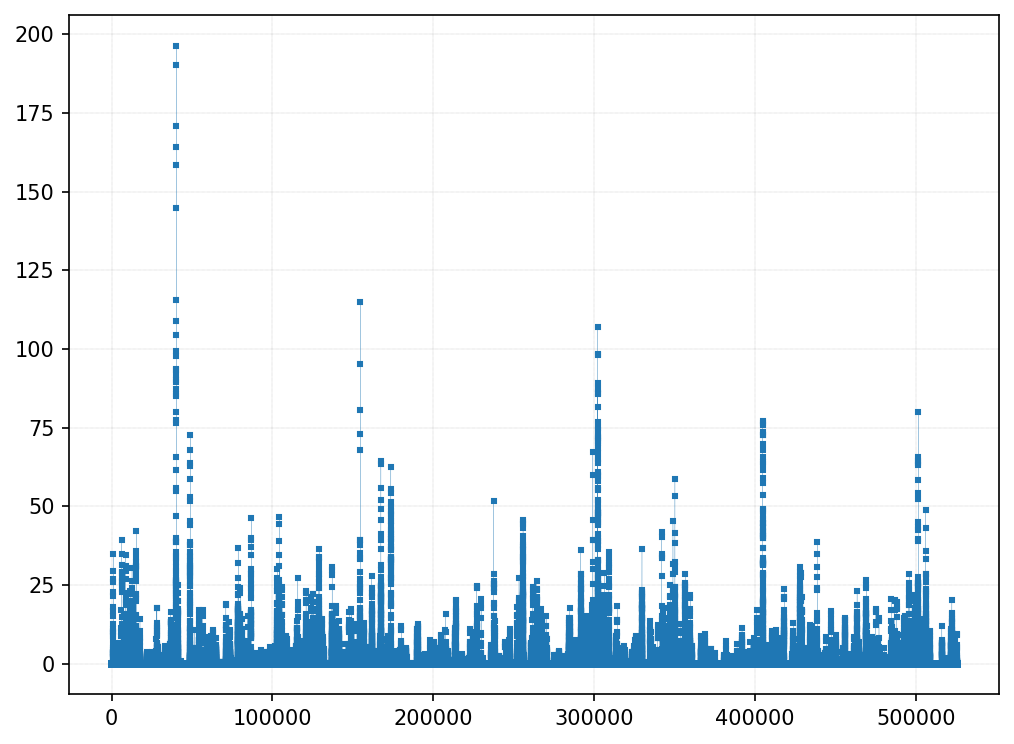

In [7]:
index=24 #Indicates the location to train [MANUALLY]

print(matrix_input[index,:].shape)
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.pyplot import grid
figure(num=None, figsize=(8, 6), dpi=150, facecolor='w', edgecolor='k')
grid(color='k', linestyle=':', linewidth=.1)
plt.plot(matrix_input[index,:],'s-',linewidth=.1,markersize=2)

In [8]:
keras.backend.clear_session()
dataset=matrix_input[index]
print(dataset.shape)

(525601,)


In [9]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Activation
from keras.layers import Dropout
from keras.layers import TimeDistributed
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [10]:
# fix random seed for reproducibility
np.random.seed(7)
dataset = dataset.astype('float32')

#Partition Dataset
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]
print(len(train), len(test))

# normalize the dataset, by feature scaling

mu=np.min(train)
sig=(np.max(train)-np.min(train))

train=(train-mu)/sig
test=(test-mu)/sig

367920 157681


In [11]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back)]
		dataX.append(a)
		dataY.append(dataset[i + look_back])
	return np.array(dataX), np.array(dataY)

In [12]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [14]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
trainY = np.reshape(trainY, (trainY.shape[0], 1))
Training=0

In [15]:
#!sudo pip install h5p
from keras.models import Sequential
from keras import regularizers
from keras.callbacks import EarlyStopping
from keras.models import load_model
from pandas import DataFrame

Training+=1
model=Sequential()
model.add(LSTM(200, input_shape=(look_back,1),activation='tanh', bias_initializer='normal',kernel_regularizer=regularizers.l2(1e-6))) 
model.add(Dropout(0.2)) #0.2
model.add(Dense(75,activation='tanh', bias_initializer='normal')) 
model.add(Dense(50,activation='tanh', bias_initializer='normal')) 
model.add(Dense(25,activation='tanh', bias_initializer='normal')) 
model.add(Dense(5, activation='tanh', bias_initializer='normal'))     
model.add(Dense(1,activation='selu', bias_initializer='normal')) 
keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8, decay=0.9, amsgrad=False)
model.compile(optimizer='adam', loss='mae', metrics=['mae']) 

es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=5) #patience=5 val_loss
#mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

history=model.fit(trainX, trainY, epochs=250, batch_size=1024, verbose=1, validation_data=(testX, testY), shuffle=False, callbacks=[es], workers=2, use_multiprocessing=True)
model.summary()

Epoch 1/250
360/360 [==============================] - 13s 37ms/step - loss: 0.0133 - mae: 0.0133 - val_loss: 0.0056 - val_mae: 0.0056
Epoch 2/250
360/360 [==============================] - 13s 36ms/step - loss: 0.0068 - mae: 0.0068 - val_loss: 0.0051 - val_mae: 0.0051
Epoch 3/250
360/360 [==============================] - 13s 36ms/step - loss: 0.0033 - mae: 0.0033 - val_loss: 0.0092 - val_mae: 0.0092
Epoch 4/250
360/360 [==============================] - 13s 36ms/step - loss: 0.0034 - mae: 0.0034 - val_loss: 0.0015 - val_mae: 0.0015
Epoch 5/250
360/360 [==============================] - 13s 36ms/step - loss: 0.0028 - mae: 0.0028 - val_loss: 0.0015 - val_mae: 0.0014
Epoch 6/250
360/360 [==============================] - 13s 36ms/step - loss: 0.0028 - mae: 0.0027 - val_loss: 0.0018 - val_mae: 0.0018
Epoch 7/250
360/360 [==============================] - 13s 36ms/step - loss: 0.0029 - mae: 0.0029 - val_loss: 0.0020 - val_mae: 0.0020
Epoch 8/250
360/360 [==============================] - 

In [16]:
hist = pd.DataFrame(history.history)
ubicaciones=['Panama','San Jose','Tegucigalpa','CDMX','Monterrey','Guadalajara'\
             ,'Tijuana','La Habana','Sto. Domingo','San Salvador','San Juan',\
             'Torreon','La Paz (BC)','Veracruz','Cancun','Chihuahua','Queretaro'\
             ,'Tuxtla (Gtz)','Cd. Juarez','San Pedro Sula','Belmopan','Kingston'\
             ,'Merida','Pto. Cabezas','Oaxaca']
hist =pd.DataFrame(history.history)
print(hist)

        loss       mae  val_loss   val_mae
0   0.013341  0.013339  0.005594  0.005592
1   0.006805  0.006802  0.005063  0.005059
2   0.003327  0.003322  0.009193  0.009186
3   0.003424  0.003415  0.001523  0.001512
4   0.002788  0.002774  0.001459  0.001442
5   0.002765  0.002746  0.001775  0.001754
6   0.002880  0.002857  0.002039  0.002013
7   0.002131  0.002104  0.000705  0.000677
8   0.001925  0.001896  0.000332  0.000302
9   0.001981  0.001951  0.003665  0.003634
10  0.001754  0.001722  0.002992  0.002960
11  0.001528  0.001495  0.001722  0.001689
12  0.001351  0.001319  0.003773  0.003740
13  0.001337  0.001304  0.001638  0.001606
14  0.001477  0.001444  0.000570  0.000537
15  0.001423  0.001390  0.000388  0.000355
16  0.001319  0.001286  0.001930  0.001898
17  0.001227  0.001195  0.000960  0.000929
18  0.001218  0.001187  0.001541  0.001511
19  0.001232  0.001202  0.000477  0.000448
20  0.001033  0.001004  0.000974  0.000946
21  0.001029  0.001000  0.000555  0.000527
22  0.00105

findfont: Font family ['Times'] not found. Falling back to DejaVu Sans.


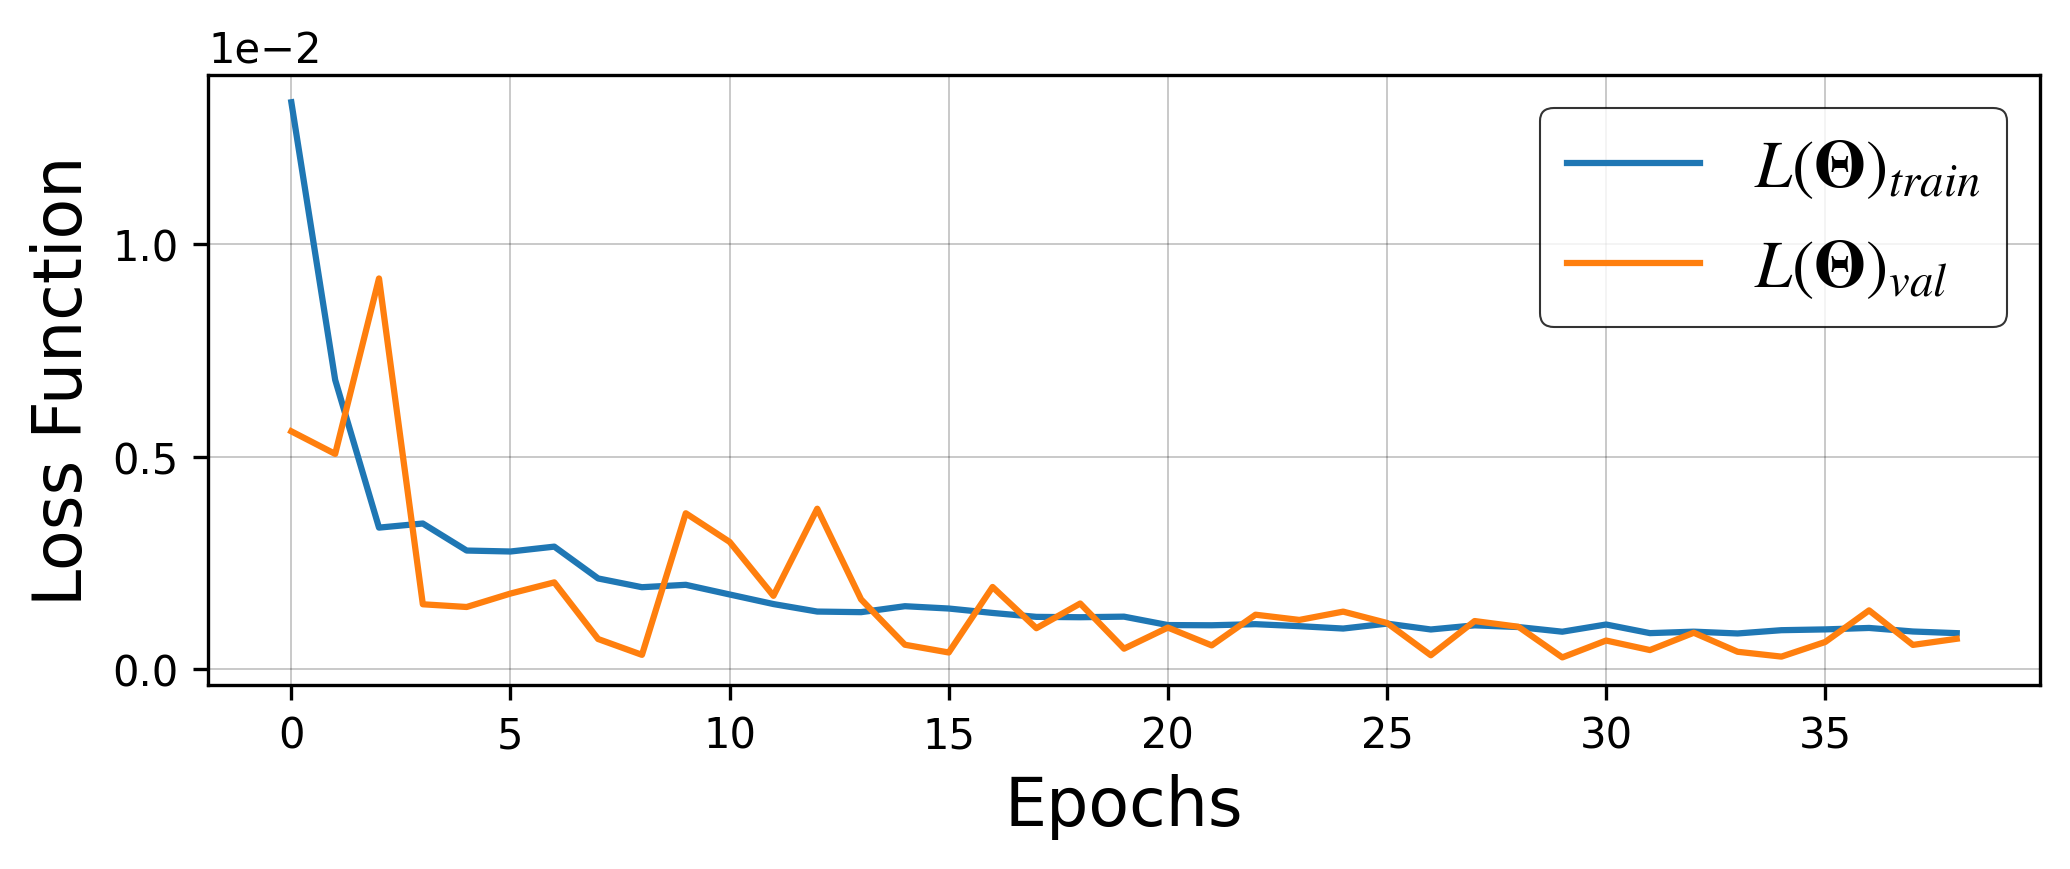

In [17]:
figure(num=None, figsize=(7, 3), dpi=300, facecolor='w', edgecolor='k')
grid(color='k', linestyle=':', linewidth=.1, which='minor', alpha=0.5)
grid(color='k', linestyle='-', linewidth=.1, which='major', alpha=1)

font={'fontname':'Times','weight':'light','size':16}

hist = pd.DataFrame(history.history)

import matplotlib.ticker as mticker

plt.plot(hist["loss"],label=r'$L(\mathbf{\Theta})_{train}$')
plt.plot(hist["val_loss"],label=r'$L(\mathbf{\Theta})_{val}$')
plt.ticklabel_format(axis='y', style='sci',scilimits=(0,0))
plt.ticklabel_format(axis='x', style='Plain',useOffset=False)
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(5)) #step for x labels

plt.xlabel('Epochs',**font)
plt.ylabel(r'Loss Function',**font) 

leg = plt.legend(loc='best',fontsize=16, edgecolor='k')
leg.get_frame().set_linewidth(0.5)

from pylab import MaxNLocator

plt.rcParams["font.family"] = "Times"
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['mathtext.it'] = 'Times:italic'
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.tight_layout()

findfont: Font family ['Times'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times'] not found. Falling back to DejaVu Sans.


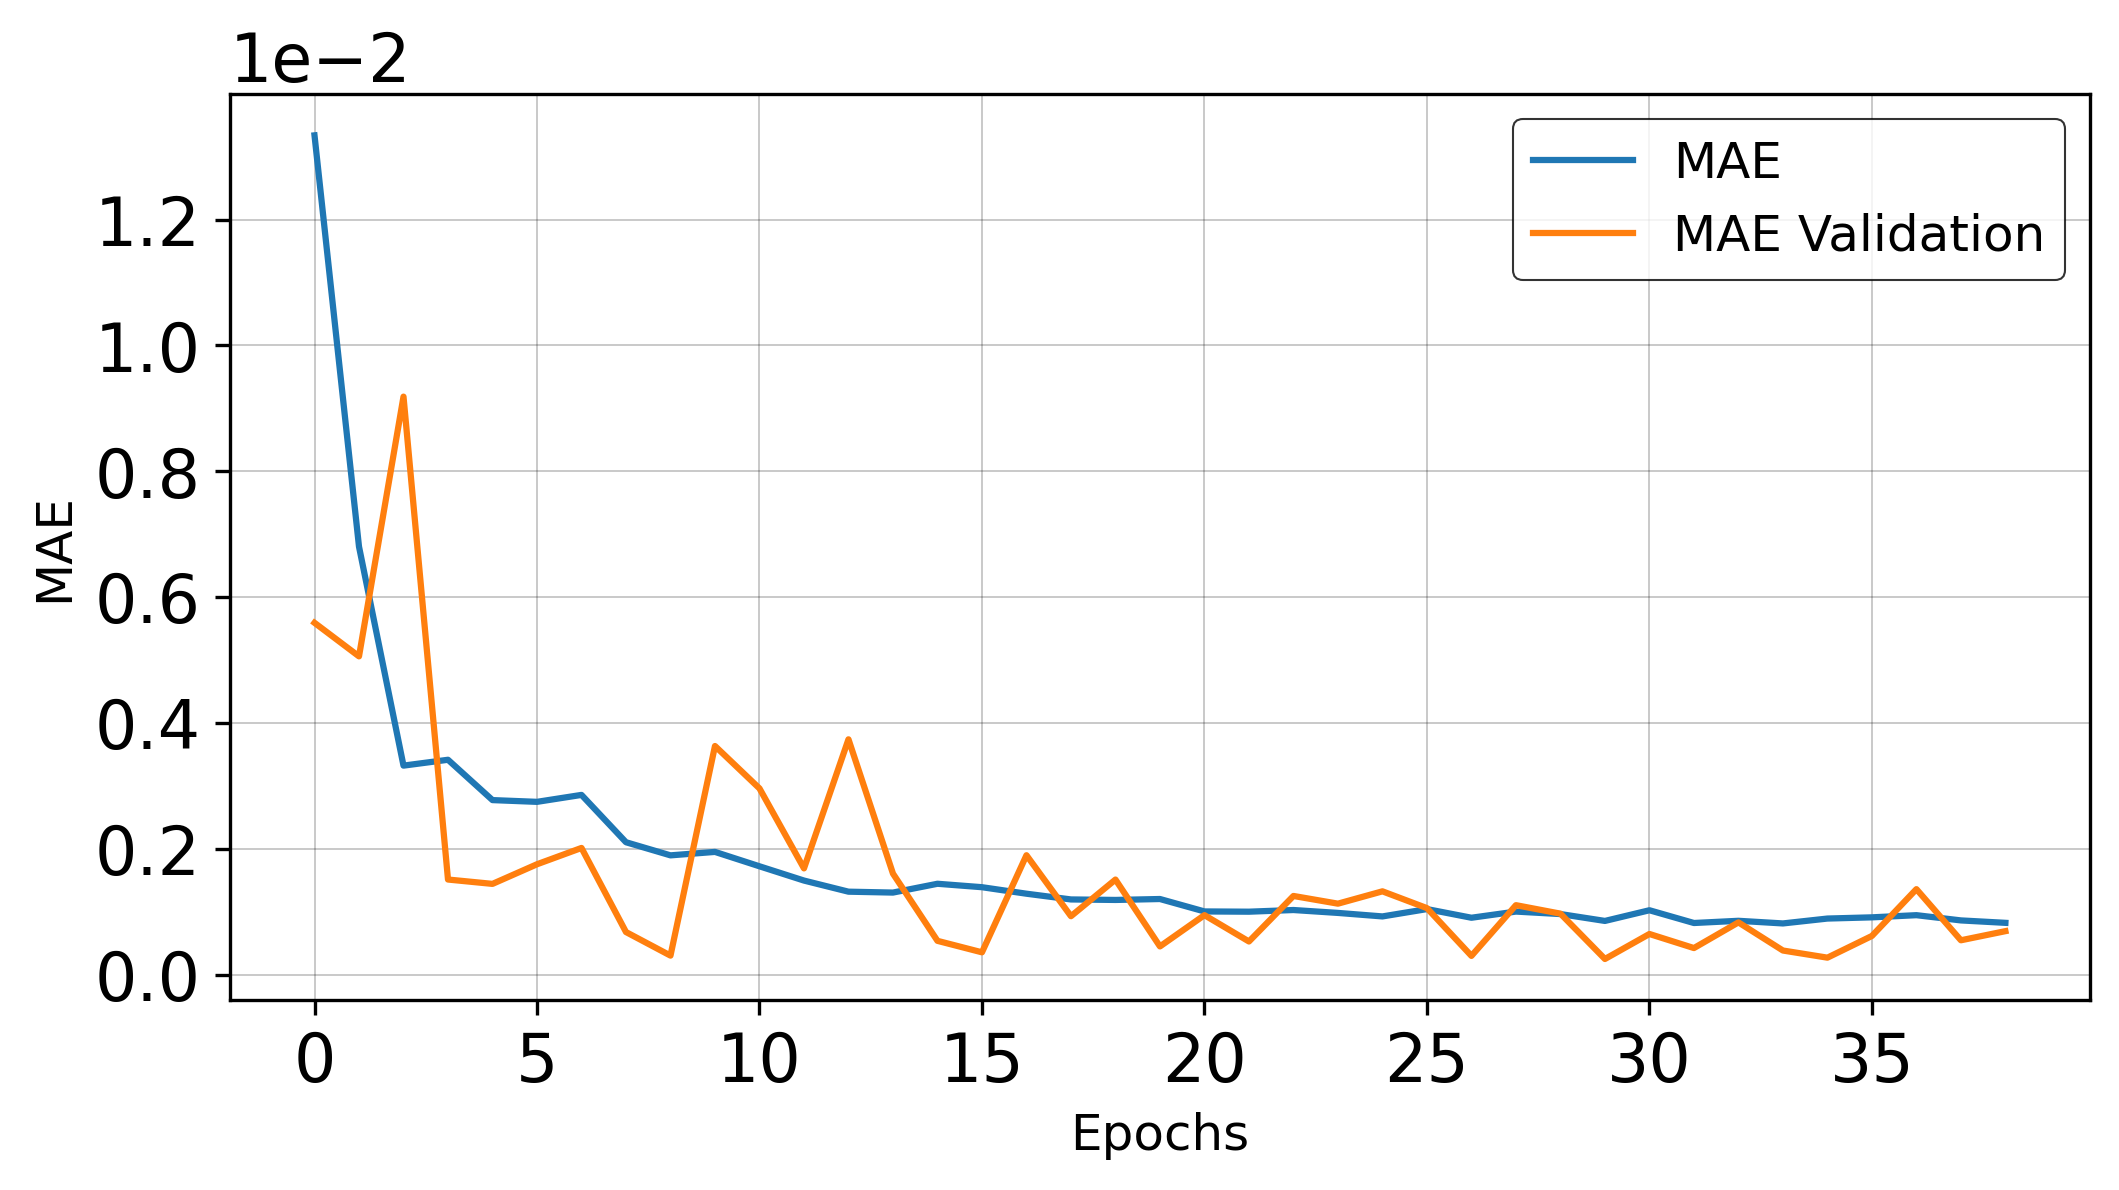

In [18]:
figure(num=None, figsize=(8, 4), dpi=300, facecolor='w', edgecolor='k')
grid(color='k', linestyle=':', linewidth=.1, which='minor', alpha=0.5)
grid(color='k', linestyle='-', linewidth=.1, which='major', alpha=1)

font={'fontname':'Times','weight':'light','size':12}

hist = pd.DataFrame(history.history)
#epoch,loss = hist["loss"]
#plt.plot(epoch-0.5,loss,label=r'$J(\theta)_{train}$')
plt.plot(hist["mae"],label='MAE')
plt.plot(hist["val_mae"],label='MAE Validation')
plt.ticklabel_format(axis='y', style='sci',scilimits=(0,0))
plt.ticklabel_format(axis='x', style='Plain',useOffset=False)
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(5)) #Da el paso para los x labels

plt.xlabel('Epochs',**font)
plt.ylabel('MAE',**font)

#leg = plt.legend(title=f'Location: {ubicaciones[indice]}',loc='best',fontsize=12, edgecolor='k')
leg = plt.legend(loc='best',fontsize=12, edgecolor='k')
leg.get_frame().set_linewidth(0.5)

plt.rcParams["font.family"] = "Times"
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['mathtext.it'] = 'Times:italic'
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 

4928/4928 [==============================] - 7s 1ms/step
(367918, 1)
Train Score: 0.8511 RMSE
Test Score: 0.5184 RMSE
Train Score: 0.1520 MAE
Test Score: 0.1357 MAE
R2 Train = 0.7984
R2 Test =  0.8672
# Trainings = 1


No handles with labels found to put in legend.
findfont: Font family ['Times'] not found. Falling back to DejaVu Sans.


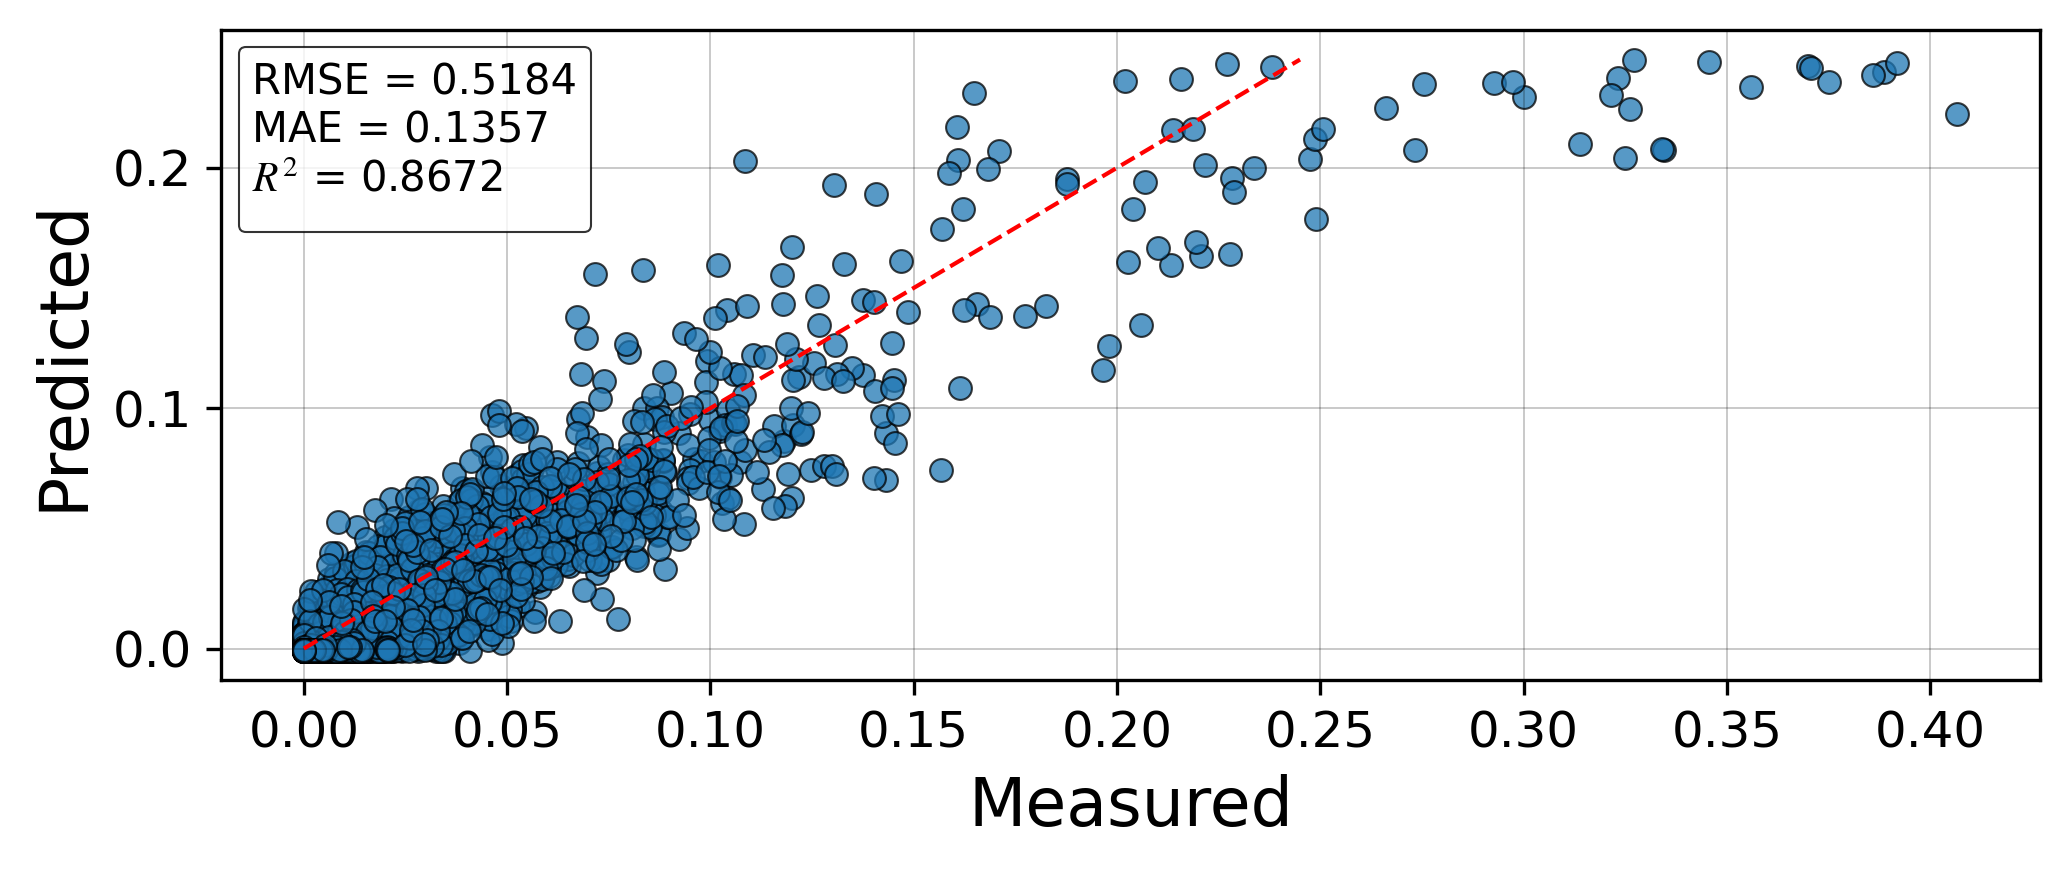

In [19]:
# make predictions
trainPredict = model.predict(trainX, verbose=1)
testPredict = model.predict(testX, verbose=1)
from sklearn.metrics import mean_absolute_error

print(trainPredict.shape)

# invert predictions
trainScore = math.sqrt(mean_squared_error(trainY[:]*sig+mu, trainPredict[:]*sig+mu))
print('Train Score: %.4f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[:]*sig+mu, testPredict[:]*sig+mu))

print('Test Score: %.4f RMSE' % (testScore))

trainScore_abs = (mean_absolute_error(trainY[:]*sig+mu, trainPredict[:]*sig+mu))
print('Train Score: %.4f MAE' % (trainScore_abs))
testScore_abs = (mean_absolute_error(testY[:]*sig+mu, testPredict[:]*sig+mu))
print('Test Score: %.4f MAE' % (testScore_abs))

R2_Train = 1-(trainScore**2*len(trainPredict))/np.sum(((trainY*sig+mu)-np.mean(trainY*sig+mu))**2)
R2_Test = 1-(testScore**2)*len(testPredict)/np.sum(((testY*sig+mu)-np.mean(testY*sig+mu))**2)

print('R2 Train = %.4f' % (R2_Train))
print('R2 Test =  %.4f' % (R2_Test))

print(f'# Trainings = {Training}')

figure(num=None, figsize=(7, 3), dpi=300, facecolor='w', edgecolor='k')
grid(color='k', linestyle=':', linewidth=.1, which='minor', alpha=0.5)
grid(color='k', linestyle='-', linewidth=.1, which='major', alpha=1)

font={'fontname':'Times','weight':'light','size':16}

plt.scatter(testY, testPredict,s=30,marker='o',edgecolor='k',alpha=0.75,linewidths=0.5)
plt.plot([testY.min(), testPredict.max()], [testY.min(), testPredict.max()],'r--',lw=1)

leg = plt.legend(title=f'RMSE = {testScore:.4f}\nMAE = {testScore_abs:.4f}\n$R^2$ = {R2_Test:.4f}',loc='best', edgecolor='k',fontsize='small')
leg.get_frame().set_linewidth(0.5)

plt.xlabel('Measured',**font)
plt.ylabel('Predicted',**font)

plt.rcParams["font.family"] = "Times"
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['mathtext.it'] = 'Times:italic'
plt.rcParams['legend.title_fontsize'] = 'x-large'
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.tight_layout()